# Определение перспективного тарифа для телеком компании



**Описание проекта**
  
**Цель**: Определить, какой тариф приносит компании больше денег.  
  
  
**Описание тарифов**  
  
**Тариф «Смарт»**  
1.	Ежемесячная плата: 550 рублей  
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
3.	Стоимость услуг сверх тарифного пакета:  
•	минута разговора: 3 рубля  
•	сообщение: 3 рубля  
•	1 Гб интернет-трафика: 200 рублей  
  
**Тариф «Ультра»**  
1.	Ежемесячная плата: 1950 рублей  
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
3.	Стоимость услуг сверх тарифного пакета:  
•	минута разговора: 1 рубль  
•	сообщение: 1 рубль  
•	1 Гб интернет-трафика: 150 рублей  
  
Важно: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.  
      



**Этапы выполнения:**
  
**Шаг 1. Открыть файлы с данными и изучить общую информацию**  
  
**Шаг 2. Подготовить данные**  
•	Привести данные к нужным типам  
•	Найти и исправить ошибки в данных  
   
  Посчитать для каждого пользователя:  
•	количество сделанных звонков и израсходованных минут разговора по месяцам  
•	количество отправленных сообщений по месяцам  
•	объем израсходованного интернет-трафика по месяцам  
•	помесячную выручку с каждого пользователя    
  
**Шаг 3. Проанализировать данные**  
• Описать поведение клиентов оператора, исходя из выборки  
• Сколько минут разговора, сколько сообщений и какой объем интернет-трафика требуется пользователям каждого тарифа в месяц?   
• Посчитать среднее количество, дисперсию и стандартное отклонение  
•Построить гистограммы  
•Описать распределения  
  
**Шаг 4. Проверить гипотезы**  
•	Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается  
•	Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
  
**Шаг 5. Написать общий вывод**



# 1. Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

display(calls.head())
display(internet.head())
display(messages.head())
display(tariffs.head())
display(users.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Файлы содержат данные о 500 пользователях.  
Типы данных столбцов: object(1), int64, datetime64[ns], float64(1).  
  

**Таблица users (информация о пользователях):**
  
•	user_id — уникальный идентификатор пользователя  
•	first_name — имя пользователя  
•	last_name — фамилия пользователя  
•	age — возраст пользователя (годы)  
•	reg_date — дата подключения тарифа (день, месяц, год)  
•	churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
•	city — город проживания пользователя  
•	tariff — название тарифного плана 
  
**Таблица calls (информация о звонках):** 
  
•	id — уникальный номер звонка  
•	call_date — дата звонка  
•	duration — длительность звонка в минутах  
•	user_id — идентификатор пользователя, сделавшего звонок
  
**Таблица messages (информация о сообщениях):**  
  
•	id — уникальный номер сообщения  
•	message_date — дата сообщения  
•	user_id — идентификатор пользователя, отправившего сообщение  
  
**Таблица internet (информация об интернет-сессиях):**  
  
•	id — уникальный номер сессии  
•	mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)  
•	session_date — дата интернет-сессии  
•	user_id — идентификатор пользователя 
  
**Таблица tariffs (информация о тарифах):** 
  
•	tariff_name — название тарифа  
•	rub_monthly_fee — ежемесячная абонентская плата в рублях  
•	minutes_included — количество минут разговора в месяц, включённых в абонентскую плату  
•	messages_included — количество сообщений в месяц, включённых в абонентскую плату  
•	mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
•	rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
•	rub_per_message — стоимость отправки сообщения сверх тарифного пакета  
•	rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)  
  


# Рассмотрим данные по каждой таблице

In [2]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Всего 500 пользователей.
Минимальный возраст пользователя - 18 лет, максимальный - 75 лет, средний - 46,6 лет.

In [3]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Минимальная длительность звонка 0 минут, максимальная - 38 минут, средняя - 6,8 минут.

In [4]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Всего пользователями использовано 149396 МБайт, минимальное значение - 0 МБайт, максимальное МБайт - 1724,8 МБайт.

In [5]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


В таблице указаны данные с датами отправленных сообщений.

In [6]:
tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


В таблице указана абонентская плата по двум тарифам и стоимость минуты, сообщения и Gb. 

# 2. Подготовим данные

In [7]:
# посчитаем количество дубликатов в данных
print('Количество дубликатов в данных о звонках:', calls.duplicated().sum()) 
print('Количество дубликатов в данных об интернет-сессиях:', internet.duplicated().sum()) 
print('Количество дубликатов в данных о сообщениях:', messages.duplicated().sum())
print('Количество дубликатов в данных о тарифах:', tariffs.duplicated().sum())
print('Количество дубликатов в данных о пользователях:', users.duplicated().sum())

Количество дубликатов в данных о звонках: 0
Количество дубликатов в данных об интернет-сессиях: 0
Количество дубликатов в данных о сообщениях: 0
Количество дубликатов в данных о тарифах: 0
Количество дубликатов в данных о пользователях: 0


Дубликатов нет

«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. 
Столбец duration - длительность звонка в минутах - имеет тип данных float64, его необходимо преобразовать данный столбец к типу данных int - целое число и округлить в верхнюю сторону.


In [8]:
# округлим значения в большую сторону
calls['duration'] = np.ceil(calls['duration']) 

# в данных о длительности звонков изменим тип данных на int
calls['duration'] = calls['duration'].astype('int')
calls.info()

# округлим значения в большую сторону
internet['mb_used'] = np.ceil(internet['mb_used']) 

# в данных о трафике изменим тип данных на int
internet['mb_used'] = internet['mb_used'].astype('int') 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: int64(2), object(2)
memory usage: 6.2+ MB


In [9]:
# в колонках с датами изменим формат данных на %Y-%m-%d
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

display(users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [10]:
# заменим пропуски на '0', 0 в кавычках, иначе дата заменяется на 1970 год, проверим количество пропусков после замены
users['churn_date'] = users['churn_date'].fillna('0') 

print('Количество пропущенных значений:', users['churn_date'].isnull().sum()) 

Количество пропущенных значений: 0


In [11]:
# посчитаем количество звонков с длительностью, равной нулю
print('Количество звонков с длительностью, равной нулю:', calls.loc[calls['duration'] == 0, 'duration'].value_counts()[0])

Количество звонков с длительностью, равной нулю: 39613


Скорее всего, нулевое значение имеют неотвеченные звонки, абонентская плата за них не взимается.  
Оставим строки со звонками, длительность которых равна 0, чтобы видеть всю картину целиком.

**Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам**

In [12]:
# добавим столбцы с месяцами в таблицы со звонками, сообщениями и интернетом
calls['call_date'] = pd.to_datetime(
    calls['call_date'], format='%Y-%m-%d'
)
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

display(calls.head())

messages['message_date'] = pd.to_datetime(
    messages['message_date'], format='%Y-%m-%d'
)
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

display(messages.head())

internet['session_date'] = pd.to_datetime(
    internet['session_date'], format='%Y-%m-%d'
)
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

display(internet.head())


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113,2018-11-25,1000,11
1,1,1000_1,1053,2018-09-07,1000,9
2,2,1000_2,1198,2018-06-25,1000,6
3,3,1000_3,551,2018-08-22,1000,8
4,4,1000_4,303,2018-09-24,1000,9


In [13]:
# сгенерируем уникальный код из имени и населенного пункта абонента для создания сводной таблицы
users['unique_name'] = users['city'] + users['first_name'] + users['last_name']

# создадим сводную таблицу по звонкам
calls['month'] = calls['call_date'].dt.month
calls_temp = calls.merge(users, on='user_id', how='inner')
calls_grouped = calls_temp.pivot_table(values=['unique_name', 'duration'], 
                       index=['user_id', 'month'], 
                       aggfunc={'unique_name': 'count', 'duration': 'sum'})
calls_grouped.columns = ['duration', 'calls']

display(calls_grouped.head())

duration  calls
user_id month                 
1000    5           159     22
        6           172     43
        7           340     47
        8           408     52
        9           466     58

In [14]:
# создадим сводную таблицу по сообщениям
messages['month'] = messages['message_date'].dt.month
messages_temp = messages.merge(users, on='user_id', how='inner')
messages_grouped = messages_temp.pivot_table(values='unique_name', 
                       index=['user_id', 'month'], 
                       aggfunc={'unique_name': 'count'})
messages_grouped.columns = ['messages']

display(messages_grouped.head())

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57

In [15]:
# создадим сводную таблицу по интернет-трафику
internet['month'] = internet['session_date'].dt.month
internet_temp = internet.merge(users, on='user_id', how='inner')
internet_grouped = internet_temp.pivot_table(values='mb_used', 
                       index=['user_id', 'month'], 
                       aggfunc={'mb_used': 'sum'})
internet_grouped.columns = ['mb_used']

display(internet_grouped.head())

mb_used
user_id month         
1000    5         2256
        6        23257
        7        14016
        8        14070
        9        14581

In [16]:
# создадим общую сводную таблицу
users_pivot = calls_grouped.join([internet_grouped, messages_grouped], how='outer')
users_pivot = users_pivot.join(users.loc[:,['user_id', 'tariff', 'city']].set_index('user_id'), how='outer')
users_pivot.fillna(0, inplace=True)
users_pivot.isnull().sum()

display(users_pivot.head())

duration  calls  mb_used  messages tariff       city
user_id month                                                      
1000    5         159.0   22.0   2256.0      22.0  ultra  Краснодар
        6         172.0   43.0  23257.0      60.0  ultra  Краснодар
        7         340.0   47.0  14016.0      75.0  ultra  Краснодар
        8         408.0   52.0  14070.0      81.0  ultra  Краснодар
        9         466.0   58.0  14581.0      57.0  ultra  Краснодар

**Рассчитаем помесячную выручку с каждого пользователя**

In [17]:
# создадим переменную для расчета помесячной выручки с каждого пользователя
def total_income_per_month(row):
    calls = row['calls']
    duration = row['duration']
    mb_used = row['mb_used']
    messages = row['messages']
    tariff = row['tariff']
    
    megabytes_included = int(tariffs.loc[tariffs.loc[:,'tariff_name'] == tariff]['mb_per_month_included'])
    messages_included = int(tariffs.loc[tariffs.loc[:,'tariff_name'] == tariff]['messages_included'])
    minutes_included = int(tariffs.loc[tariffs.loc[:,'tariff_name'] == tariff]['minutes_included'])
    monthly_fee = int(tariffs.loc[tariffs.loc[:,'tariff_name'] == tariff]['rub_monthly_fee'])
    price_for_gb = int(tariffs.loc[tariffs.loc[:,'tariff_name'] == tariff]['rub_per_gb'])
    price_for_message = int(tariffs.loc[tariffs.loc[:,'tariff_name'] == tariff]['rub_per_message'])
    price_for_minute = int(tariffs.loc[tariffs.loc[:,'tariff_name'] == tariff]['rub_per_minute'])
    
# объявим переменные перерасхода для трафика, сообщений и звонков, при наличии перерасхода значения умножим на стоимость
    over_mb = 0                
    over_msg = 0               
    over_calls = 0             
    
# для получения цены умножим значения перерасхода на стоимость
    if mb_used > megabytes_included:
        over_mb = ((mb_used - megabytes_included) / 1024) * price_for_gb
    
# значения минут и сообщений округлим
    if duration > minutes_included:
        over_calls = (duration - minutes_included) * price_for_minute
        
    if messages > messages_included:
        over_msg = (messages - messages_included) * price_for_message 
    
# посчитаем суммарную выручку с пользователя, добавив ко всем перерасходам абонентскую плату
    return over_mb + over_msg + over_calls + monthly_fee

In [18]:
users_pivot['total_income'] = users_pivot.apply(total_income_per_month, axis = 1)

display(users_pivot.head())

duration  calls  mb_used  messages tariff       city  \
user_id month                                                         
1000    5         159.0   22.0   2256.0      22.0  ultra  Краснодар   
        6         172.0   43.0  23257.0      60.0  ultra  Краснодар   
        7         340.0   47.0  14016.0      75.0  ultra  Краснодар   
        8         408.0   52.0  14070.0      81.0  ultra  Краснодар   
        9         466.0   58.0  14581.0      57.0  ultra  Краснодар   

               total_income  
user_id month                
1000    5            1950.0  
        6            1950.0  
        7            1950.0  
        8            1950.0  
        9            1950.0

**Вывод:**  
В данных о длительности звонков и трафике изменили типы данных на int и округлили данные в большую сторону.  
В графе с датой отключения заменили пропуски на '0'.  
В колонках с датами изменили формат данных на %Y-%m-%d  
Создали новую таблицу с идентификационным номером абонента, тарифом и городом добавив колонку с месяцами.  

# 3. Проанализируем данные

**Посчитаем среднее количество минут в месяц**

In [19]:
# создадим датафрейм в котором будет среднее количество минут для каждого месяца для тарифа "Smart"
smart_data_calls = users_pivot.query('tariff == "smart"').groupby(['tariff','month']).agg({'duration':'mean'}).reset_index()

# создадим датафрейм в котором будет среднее количество минут для каждого месяца для тарифа "Ultra"
ultra_data_calls = users_pivot.query('tariff == "ultra"').groupby(['tariff','month']).agg({'duration':'mean'}).reset_index()
 

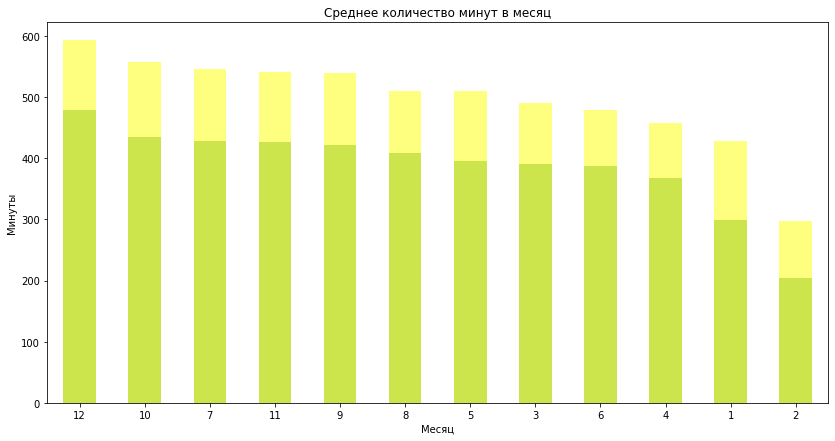

In [20]:
# нарисуем график для тарифа "Smart" зеленым цветом
ax = (
    smart_data_calls
    .sort_values(by='duration', ascending=False)
    .plot(y='duration', x='month', kind='bar', title='Среднее количество минут в месяц', figsize=(14, 7), alpha=0.4, color='green', grid=True, legend=False)
)
# нарисуем график для тарифа "Ultra" желтым цветом
(
    ultra_data_calls
    .sort_values(by='duration', ascending=False)
    .plot(y='duration', x='month', ax=ax, kind='bar', color='yellow', alpha=0.5, legend=False)
)
plt.xticks(rotation=0)
plt.xlabel('Месяц')
plt.ylabel('Минуты')
plt.show()

Количество израсходованных минут у тарифа Ultra во все месяцы больше чем у тарифа Smart.

**Посчитаем среднее количество, дисперсию и стандартное отклонение**

In [21]:
# рассчитаем среднее количество минут для двух тарифов
smart_mean = int(smart_data_calls['duration'].mean()) 
ultra_mean = int(ultra_data_calls['duration'].mean()) 

# посчитаем среднее значение для каждого тарифа
print('Среднее количество минут для тарифа "Smart":', smart_mean, 'минут')
print('Среднее количество минут для тарифа "Ultra":', ultra_mean, 'минут')
print('Разница:', smart_mean - ultra_mean, 'минут')
print()

Среднее количество минут для тарифа "Smart": 386 минут
Среднее количество минут для тарифа "Ultra": 495 минут
Разница: -109 минут



In [22]:
# рассчитаем дисперсию для тарифа "Smart"
smart = users_pivot.query('tariff == "smart"')['duration'] 
smart_var = np.var(smart, ddof=1)  
print('Дисперсия тарифа "Smart":', '{:.2f}'.format(smart_var))

# рассчитаем дисперсию для тарифа "Ultra"
ultra = users_pivot.query('tariff == "ultra"')['duration'] # df с тарифом "ultra"
ultra_var = np.var(ultra, ddof=1) # расчёт дисперсии
print('Дисперсия тарифа "ultra":', '{:.2f}'.format(ultra_var))
print('')


Дисперсия тарифа "Smart": 36219.32
Дисперсия тарифа "ultra": 100873.63



In [23]:
# рассчитаем стандартное отклонение для тарифа "Smart"
smart_std = np.std(smart, ddof=1) 
print('Стандартное отклонение для тарифа "Smart":', '{:.2f}'.format(smart_std))

# рассчитаем стандартное отклонени для тарифа "Ultra"
ultra_std = np.std(ultra, ddof=1) 
print('Стандартное отклонение для "Ultra":', '{:.2f}'.format(ultra_std))

print('Разница:', '{:.2f}'.format(100 - (smart_std / ultra_std * 100)), '%')

Стандартное отклонение для тарифа "Smart": 190.31
Стандартное отклонение для "Ultra": 317.61
Разница: 40.08 %


**Вывод**  
Среднее количество израсходованных минут у тарифа Ultra на 109 минут больше чем у тарифа Smart.  
Стандартное отклонения для тарифа Ultra на 40% больше чем для тарифа Smart.  
Больше всего минут для обоих тарифов было израсходовано в декабре, а меньше всего в феврале.  
Данные показатели говорят о том, что пользователи с тарифом Ultra расходуют в среднем на 22% минут больше, чем пользователи с тарифом Smart.

**Посчитаем количество собщений в месяц**

In [24]:
# создадим датафрейм в котором будет среднее количество смс для каждого месяца для тарифа "Smart"
smart_data_messages = users_pivot.query('tariff == "smart"').groupby(['tariff','month']).agg({'messages':'mean'}).reset_index()

# создадим датафрейм в котором будет среднее количество смс для каждого месяца для тарифа "Ultra"
ultra_data_messages = users_pivot.query('tariff == "ultra"').groupby(['tariff','month']).agg({'messages':'mean'}).reset_index()



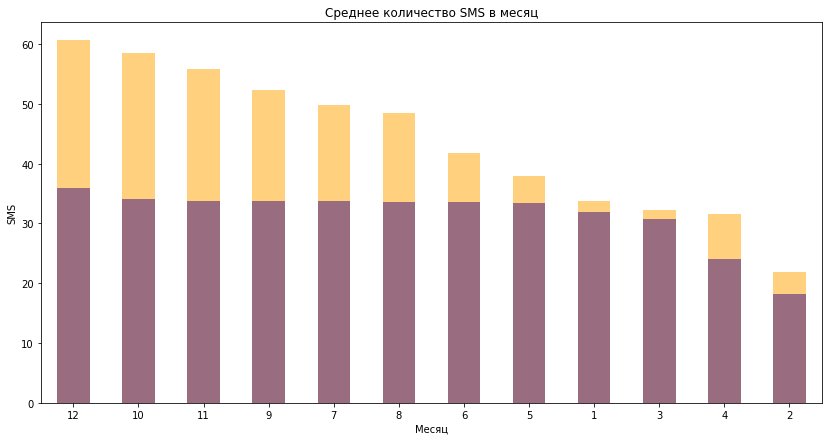

In [25]:
# нарисуем график для тарифа "Smart" желтым цветом
ax = (
    smart_data_messages
    .sort_values(by='messages', ascending=False)
    .plot(y='messages', x='month', kind='bar', title='Среднее количество SMS в месяц', figsize=(14, 7), alpha=0.8, color='blue', grid=True, legend=False)
)

# нарисуем график для тарифа "Ultra" оранжевым цветом
(
    ultra_data_messages
    .sort_values(by='messages', ascending=False)
    .plot(y='messages', x='month', ax=ax, kind='bar', color='orange', alpha=0.5, legend=False)
)

plt.xticks(rotation=0)
plt.xlabel('Месяц')
plt.ylabel('SMS')
plt.show() 



In [27]:
# рассчитаем среднее количество смс
smart_mean = int(smart_data_messages['messages'].mean()) 
ultra_mean = int(ultra_data_messages['messages'].mean()) 

# рассчитаем средние значения для каждого тарифа
print('Среднее количество смс для тарифа "Smart":', smart_mean, 'SMS')
print('Среднее количество смс для тарифа "Ultra":', ultra_mean, 'SMS')
print('Разница:', smart_mean - ultra_mean, 'SMS')
print()

Среднее количество смс для тарифа "Smart": 31 SMS
Среднее количество смс для тарифа "Ultra": 43 SMS
Разница: -12 SMS



In [28]:
# рассчитаем дисперсию для тарифа "Smart"
smart = users_pivot.query('tariff == "smart"')['messages'] 
smart_var = np.var(smart, ddof=1)  
print('Дисперсия тарифа "Smart":',  '{:.2f}'.format(smart_var))

# рассчитаем дисперсию для тарифа "Ultra"
ultra = users_pivot.query('tariff == "ultra"')['messages'] 
ultra_var = np.var(ultra, ddof=1) 
print('Дисперсия тарифа "Ultra":', '{:.2f}'.format(ultra_var))
print('')

Дисперсия тарифа "Smart": 796.81
Дисперсия тарифа "Ultra": 2285.27



In [29]:
# рассчитаем стандартное отклонение для тарифа "Smart"
smart_std = np.std(smart, ddof=1) 
print('Стандартное отклонение для тарифа "Smart":', '{:.2f}'.format(smart_std))

# рассчитаем стандартное отклонение для тарифа "Ultra"
ultra_std = np.std(ultra, ddof=1) 
print('Стандартное отклонение для "Ultra":', '{:.2f}'.format(ultra_std))

print('Разница составляет:', '{:.2f}'.format(100 - (smart_std / ultra_std * 100)), '%')

Стандартное отклонение для тарифа "Smart": 28.23
Стандартное отклонение для "Ultra": 47.80
Разница составляет: 40.95 %


**Вывод**  
Количество отправленных SMS для тарифа Ultra во всех месяцах больше чем для тарифа Smart (в январе и марте количество практически одинаковое у обоих тарифов).  
Среднее количество отправленных SMS в тарифе Ultra на 12 смс больше чем в тарифе Smart.  
Стандартное отклонения для тарифа Ultra на 41% больше чем для тарифа Smart.  
Больше всего минут для обоих тарифов было израсходовано в декабре, а меньше всего в феврале.  
Данные показатели говорят о том, что пользователи с тарифом Ultra расходуют в среднем на 28% больше смс сообщений, чем пользователи тарифа Smart.

**Рассчитаем объем интернет-трафика в месяц**

In [30]:
# создадим датафрейм в котором будет средний объем трафика для каждого месяца для тарифа "Smart"
smart_data_internet = users_pivot.query('tariff == "smart"').groupby(['tariff','month']).agg({'mb_used':'mean'}).reset_index()

# создадим датафрейм в котором будет средний объём трафика для каждого месяца для тарифа "ultra"
ultra_data_internet = users_pivot.query('tariff == "ultra"').groupby(['tariff','month']).agg({'mb_used':'mean'}).reset_index()

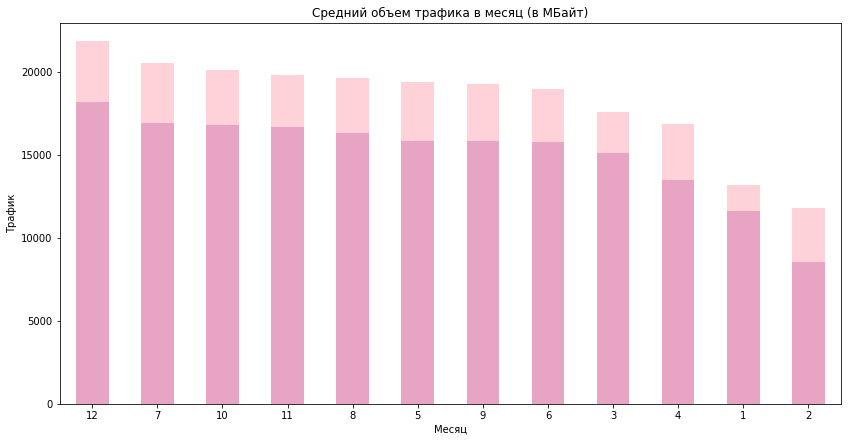

In [31]:
# нарисуем график для тарифа "Smart" фиолетовым цветом
ax = (
    smart_data_internet
    .sort_values(by='mb_used', ascending=False)
    .plot(y='mb_used', x='month', kind='bar', title='Средний объем трафика в месяц (в МБайт)', figsize=(14, 7), alpha=0.6, color='purple', grid=True, legend=False)
)

# нарисуем график для тарифа "Ultra" розовым цветом
(
    ultra_data_internet
    .sort_values(by='mb_used', ascending=False)
    .plot(y='mb_used', x='month', ax=ax, kind='bar', color='pink', alpha=0.7, legend=False)
)

plt.xticks(rotation=0)
plt.xlabel('Месяц')
plt.ylabel('Трафик')
plt.show() 

In [32]:
# рассчитаем средний трафик для двух тарифов
smart_mean = int(smart_data_internet['mb_used'].mean()) 
ultra_mean = int(ultra_data_internet['mb_used'].mean()) 

# рассчитаем средние значения для каждого тарифа
print('Средний объём трафика для тарифа "Smart":', smart_mean, 'МБайт')
print('Средний объём трафика для тарифа "Ultra":', ultra_mean, 'МБайт')
print('Разница:', smart_mean - ultra_mean, 'мб')
print()

Средний объём трафика для тарифа "Smart": 15077 МБайт
Средний объём трафика для тарифа "Ultra": 18222 МБайт
Разница: -3145 мб



In [33]:
# рассчитаем дисперсию для тарифа "Smart"
smart = users_pivot.query('tariff == "smart"')['mb_used'] # df с тарифом "smart"
smart_var = np.var(smart, ddof=1)  # расчёт дисперсии
print('Дисперсия тарифа "Smart":', '{:.2f}'.format(smart_var))

# рассчитаем дисперсию для тарифа "Ultra"
ultra = users_pivot.query('tariff == "ultra"')['mb_used'] # df с тарифом "ultra"
ultra_var = np.var(ultra, ddof=1) # расчёт дисперсии
print('Дисперсия тарифа "Ultra":', '{:.2f}'.format(ultra_var))
print('')

Дисперсия тарифа "Smart": 34545911.13
Дисперсия тарифа "Ultra": 101935621.05



In [34]:
# рассчитаем стандартное отклонение для тарифа "Smart"
smart_std = np.std(smart, ddof=1) # расчёт стандартного отклонения
print('Стандартное отклонение для тарифа "Smart":', '{:.2f}'.format(smart_std))

# рассчитаем стандартное отклонение для тарифа "ultra"
ultra_std = np.std(ultra, ddof=1) # расчёт стандартного отклонения
print('Стандартное отклонение для "Ultra":', '{:.2f}'.format(ultra_std))

print('Разница:', '{:.2f}'.format(100 - (smart_std / ultra_std * 100)), '%')

Стандартное отклонение для тарифа "Smart": 5877.58
Стандартное отклонение для "Ultra": 10096.32
Разница: 41.78 %


**Вывод**  
Объем интернет-трафика для тарифа Ultra в каждом месяце больше чем для тарифа Smart.  
Средний объем трафика для тарифа Ultra на 3.1 гб больше чем для тарифа Smart.  
Стандартное отклонения для тарифа Ultra почти на 42% больше чем для тарифа Smart.  
Больше всего интернет трафика для обоих тарифов было израсходовано в декабре, а меньше всего в январе.  
Данные показатели говорят о том, что пользователи с тарифом Ultra расходуют в среднем на 17% больше интернет-трафика, чем пользователи с тарифом Smart.

**Рассчитаем суммарную выручку по тарифному плану в месяц**

In [35]:
# рассчитаем выручку по тарифному плану "Ultra"
ultra_revenue = users_pivot.query('tariff =="ultra"').groupby(by='month').agg({'total_income':'sum'}).reset_index()

# рассчитаем выручку  плану "Smart"
smart_revenue = users_pivot.query('tariff =="smart"').groupby(by='month').agg({'total_income':'sum'}).reset_index()

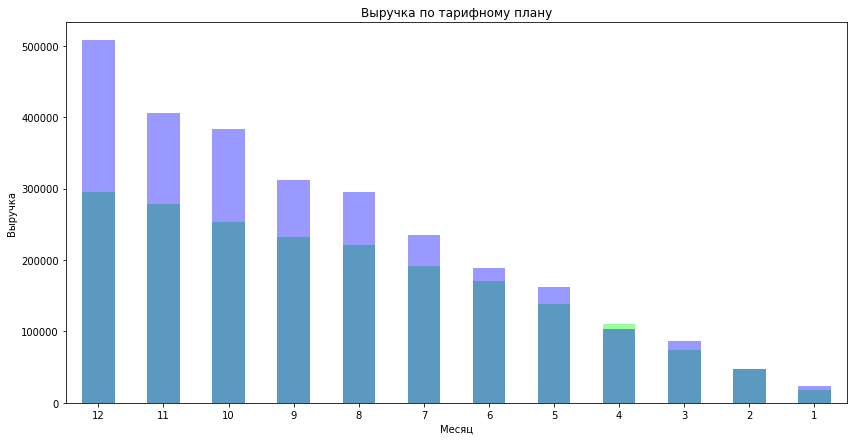

In [36]:
# нарисуем график для тарифа "ultra" синим цветом
ax = (
    ultra_revenue
    .sort_values(by='total_income', ascending=False)
    .plot(y='total_income', x='month', kind='bar', title='Выручка по тарифному плану', figsize=(14, 7), alpha=0.4, color='lime', grid=True, legend=False)
)

# нарисуем график для тарифа "smart" фиолетовым цветом
(
    smart_revenue
    .sort_values(by='total_income', ascending=False)
    .plot(y='total_income', x='month', ax=ax, kind='bar', color='blue', alpha=0.4, legend=False)
)

plt.xticks(rotation=0)
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.show() 

In [37]:
# рассчитаем средние значения для каждого тарифа
print('Средний объем ежемесячной выручки для тарифа "Smart":', '{:.2f}'.format(smart_revenue['total_income'].mean()), 'руб')
print('Средний объем ежемесячной выручки для тарифа "Ultra":', '{:.2f}'.format(ultra_revenue['total_income'].mean()), 'руб')
print('Разница:', '{:.1f}'.format((smart_revenue['total_income'].mean() / ultra_revenue['total_income'].mean() * 100) - 100), '%')

Средний объем ежемесячной выручки для тарифа "Smart": 229094.66 руб
Средний объем ежемесячной выручки для тарифа "Ultra": 169135.17 руб
Разница: 35.5 %


**Вывод**
Ежемесячная выручка тарифа Smart на 47% больше, чем выручка тарифа Ultra.  
Пользователи тарифа "Ultra" пользуются услугами оператора более свободно: они больше разговаривают, больше проводят времени в интернете, отправляют больше сообщений чем пользователи тарифа "Smart".

# 4. Проверка гипотез

**Проверим гипотезу "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается".**


**Сформулируем нулевую гипотезу**: Средняя выручка пользователей тарифа «Ultra» равна средней выручке пользователей тарифа «Smart».   
  
**Сформулируем альтернативную гипотезу**: средняя выручка пользователей тарифа «Ultra» не равна средней выручке пользователей тарифа «Smart».


In [38]:
# создадим таблицу для тарифа "Smart", где для каждого user_id будет посчитано средняя сумма расходов
array_smart = users_pivot.query('tariff == "smart"').groupby('user_id').agg({'total_income':'mean'}).reset_index()

# создадим таблицу для тарифа "Ultra", где для каждого user_id будет посчитано средняя сумма расходов
array_ultra = users_pivot.query('tariff == "ultra"').groupby('user_id').agg({'total_income':'mean'}).reset_index()

In [39]:
# сделаем выборку из 100 строк для проверки гипотезы
array_smart = array_smart[0:100]['total_income'].tolist()
array_ultra = array_ultra[0:100]['total_income'].tolist()

In [40]:
# критический уровень статистической значимости
alpha = 0.05 

# если p-value окажется меньше него - отвергнем гипотезу
# проверка нулевой гипотезы

results = st.ttest_ind(array_smart, array_ultra)

print('p-значение составляет:', results.pvalue)

if (results.pvalue < alpha):
    print("Гипотеза - Средняя выручка пользователей тарифов «Ultra» и «Smart» равна - отвергнута")
else:
    print("Гипотеза - Средняя выручка пользователей тарифов «Ultra» и «Smart» различается - подтверждена")

p-значение составляет: 2.1798976911434033e-30
Гипотеза - Средняя выручка пользователей тарифов «Ultra» и «Smart» равна - отвергнута


**Вывод**  
Полученное p-значение говорит о том, что средняя выручка пользователей тарифов «Ultra» и «Smart» различается и она не равна.

**Проверим гипотезу "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"**

**Сформулируем нулевую гипотезу**: : средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.  
  
**Сформулируем альтернативную гипотезу**: средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов.  

In [41]:
# создадим таблицу для Москвы где для каждого user_id будет посчитано средняя сумма расходов
array_moskow = users_pivot.query('city == "Москва"').groupby('user_id').agg({'total_income':'mean'}).reset_index()

# создадим таблицу для Регионов где для каждого user_id будет посчитано средняя сумма расходов
array_other_city = users_pivot.query('city != "Москва"').groupby('user_id').agg({'total_income':'mean'}).reset_index()

In [42]:
# сделаем выборку из 100 строк для проверки гипотезы
array_moskow = array_moskow[0:100]['total_income'].tolist()
array_other_city = array_other_city[0:100]['total_income'].tolist()

In [43]:
# критический уровень статистической значимости
alpha = .05 

# если p-value окажется меньше него - отвергнем гипотезу
# проверка нулевой гипотезы

results = st.ttest_ind(array_moskow, array_other_city)

print('p-значение составляет:', results.pvalue)

if (results.pvalue < alpha):
    print("Гипотеза - Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов - отвергнута")
else:
    print("Гипотеза - Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов - подтверждена")

p-значение составляет: 0.9748655094296108
Гипотеза - Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов - подтверждена


**Вывод**  

Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.


# Общий вывод

Для анализа была предоставлена информация о пользователях телекомуникационной компании «Мегалайн» за 2018 год. Вся необходимая информация была сохранена в 5 датасетах, содержащих общую информацию о клиентах, информацию о датах и продолжительности звонков, отправленных сообщениях, интернет сессиях и использованном трафике, а так же общую информацию о тарифах компании.
Во время изучения общей информации нам удалось выяснить, что в представленной выборке клиентов содержится 500 пользователей.

В ходе анализа были удалены строки с нулевыми значениями.

Статистические характеристики и графики позволили сделать вывод о том, что в целом пользователи тарифа "Ultra" пользуются услугами оператора более свободно: они больше разговаривают, больше проводят времени в интернете, отправляют больше сообщений, при этом среднестатистический пользователь тарифа "Ultra" не превышает тарифные лимиты. С другой стороны среднестатистическому пользователю тарифа "Smart" приходится докупать трафик сверх лимита.

В конце года расходы по всем параметрам обоих тарифов повышаются, а в начале года падают.

**Пользователи тарифа «Smart» приносят больше прибыли, чем пользователи тарифа «Ultra».
Однако средняя выручка от тарифа «Ultra» больше, чем от тарифа «Smart». 
Среди пользователей тарифа «Smart» заметна тенденция к увеличению потребления услуг компании, что в конечном итоге может привести их к более дорогому «Ultra». Увеличение количества пользователей этого тарифа смогло бы значительно увеличить выручку компании.** 

Гипотеза "Средняя выручка пользователей тарифов «Ultra» и «Smart» равна" отвергнута.  
Гипотеза "Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов" подтверждена.  
  
Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.
